<a href="https://colab.research.google.com/github/elza-2611/Project/blob/main/COB_Stats_Project_Booked_Held%2C_Sat_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from sklearn.utils import resample
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stats data COB.xlsx to Stats data COB (4).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Stats data COB.xlsx']))

In [ ]:
df.head(5)

,Month,Appt Booked,Appointment Sat,Conversion % (Booked:Held),Application,Conversion %(Sat:Application)
0,Aug,1473,960,0.651731,421,0.438542
1,Sep,1040,629,0.604808,226,0.359300
2,Oct,557,333,0.597846,114,0.342342
3,Nov,577,350,0.606586,122,0.348571
4,Dec,310,170,0.548387,49,0.288235


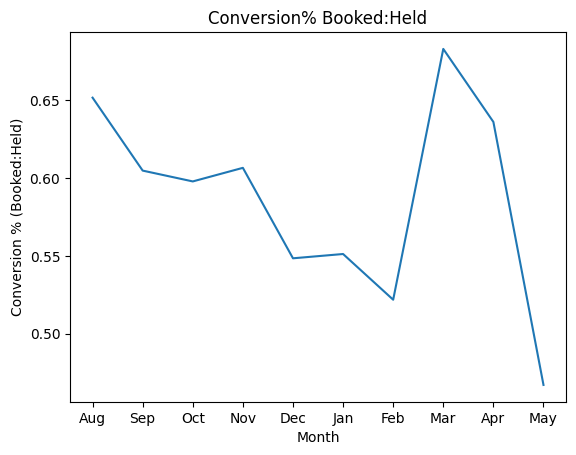

In [ ]:
# Plot the conversion percentages over time
plt.plot(df['Month'], df['Conversion % (Booked:Held)'])
plt.xlabel('Month')
plt.ylabel('Conversion % (Booked:Held)')
plt.title('Conversion% Booked:Held')
plt.show()

In [ ]:
Q1 = df['Conversion % (Booked:Held)'].quantile(0.25)
Q3 = df['Conversion % (Booked:Held)'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_filtered = df[(df['Conversion % (Booked:Held)'] >= Q1 - 1.5 * IQR) & (df['Conversion % (Booked:Held)'] <= Q3 + 1.5 * IQR)]


In [ ]:
# Calculate the average conversion rate
average_conversion_rate = data_filtered['Conversion % (Booked:Held)'].mean()
print('Average Conversion% Booked:Held:', average_conversion_rate)


Average Conversion% Booked:Held: 0.586838581544563


In [ ]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
null_hypothesis = 0.5  # Null hypothesis: average conversion rate = 0.5 (or any desired value)
t_statistic, p_value = ttest_1samp(data_filtered['Conversion % (Booked:Held)'], null_hypothesis)

print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: 4.219941847220446
P-value: 0.0022396420227341596


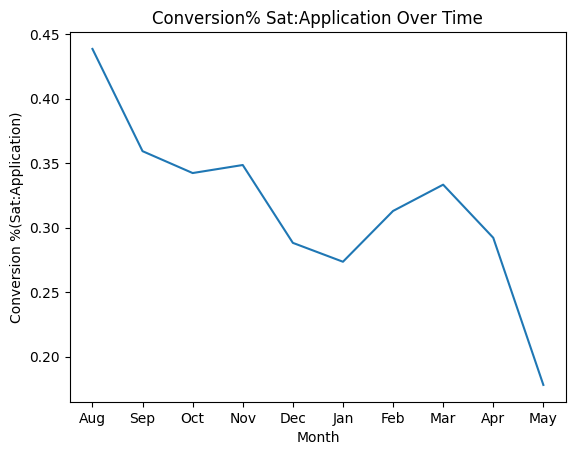

In [ ]:
# Plot the conversion percentages over time
plt.plot(df['Month'], df['Conversion %(Sat:Application)'])
plt.xlabel('Month')
plt.ylabel('Conversion %(Sat:Application)')
plt.title('Conversion% Sat:Application Over Time')
plt.show()

In [ ]:
Q1 = df['Conversion %(Sat:Application)'].quantile(0.25)
Q3 = df['Conversion %(Sat:Application)'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_filtered = df[(df['Conversion %(Sat:Application)'] >= Q1 - 1.5 * IQR) & (df['Conversion %(Sat:Application)'] <= Q3 + 1.5 * IQR)]


In [ ]:
# Calculate the average conversion rate
average_conversion_rate = data_filtered['Conversion %(Sat:Application)'].mean()
print('Average Conversion %(Sat:Application):', average_conversion_rate)

Average Conversion %(Sat:Application): 0.3188158635292622


In [ ]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
null_hypothesis = 0.5  # Null hypothesis: average conversion rate = 0.5 (or any desired value)
t_statistic, p_value = ttest_1samp(data_filtered['Conversion %(Sat:Application)'], null_hypothesis)

print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: -16.191770795006303
P-value: 8.338793715561613e-07
